In [ ]:
!pip install tpot
!pip install dataprep

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 988.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.8 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=05e59673131430748908c786cf7e9d76cff0744306765075d1d51d446c361c53
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.6/152.6 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 28.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask[array,dataframe,delayed] to determine which version is compatible with other requirement

In [74]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from dataprep.eda import create_report
from tpot import TPOTClassifier
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from tpot import TPOTRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from dataprep.eda import create_report

In [55]:
drive.mount('/content/drive')

csv_file = '/content/drive/MyDrive/spotify_tracks.csv'
df = pd.read_csv(csv_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Preprocessing
# Encode categorical columns

label_encoder = LabelEncoder()

df['genre'] = label_encoder.fit_transform(df['genre'])
df['artists'] = label_encoder.fit_transform(df['artists'])
df['album'] = label_encoder.fit_transform(df['album'])
df['explicit'] = df['explicit'].astype(int)  # Convert Boolean to int

# Separate features and target
X = df.drop(['id', 'name', 'popularity'], axis=1)  # Drop non-feature columns
y = df['popularity']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
report = create_report(df)

report.save("/content/Raport_Profilowania_Dataprep.html")

from google.colab import files
files.download("/content/Raport_Profilowania_Dataprep.html")

Computing series-sum-chunk-711bf7473d67ca3568c7fb5f815f451c-95c5cae97a2bca6814534a3fb851061d:  63%|██████▎   | 793/1250 [00:00<00:00, 1987.57it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))


Report has been saved to /content/Raport_Profilowania_Dataprep.html!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

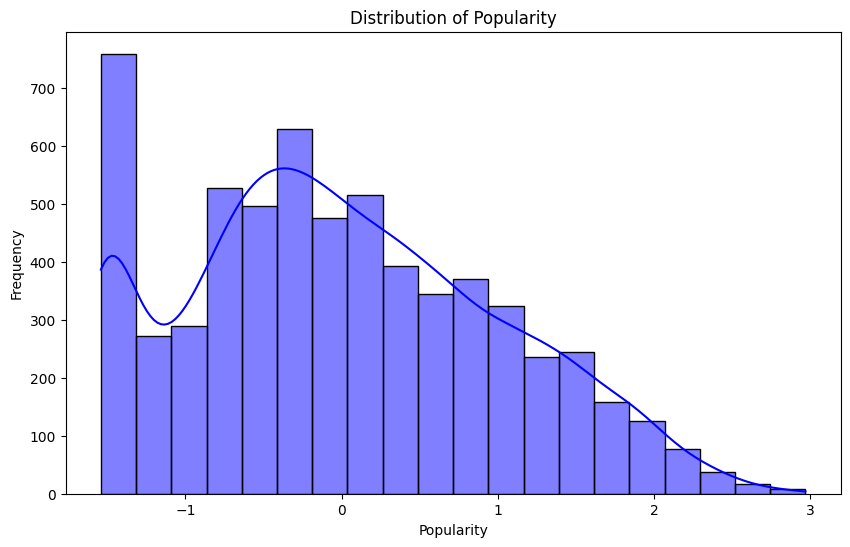

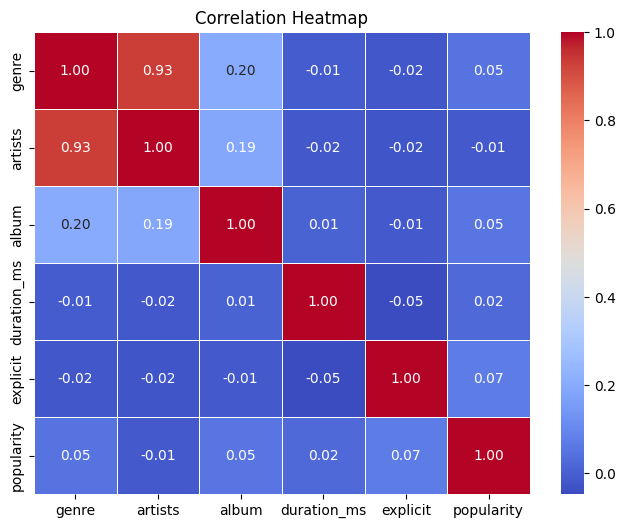

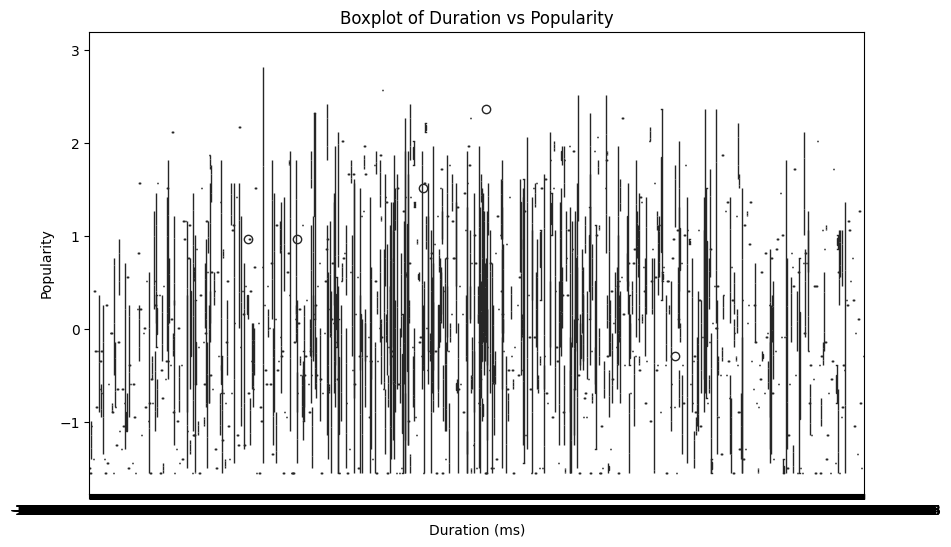

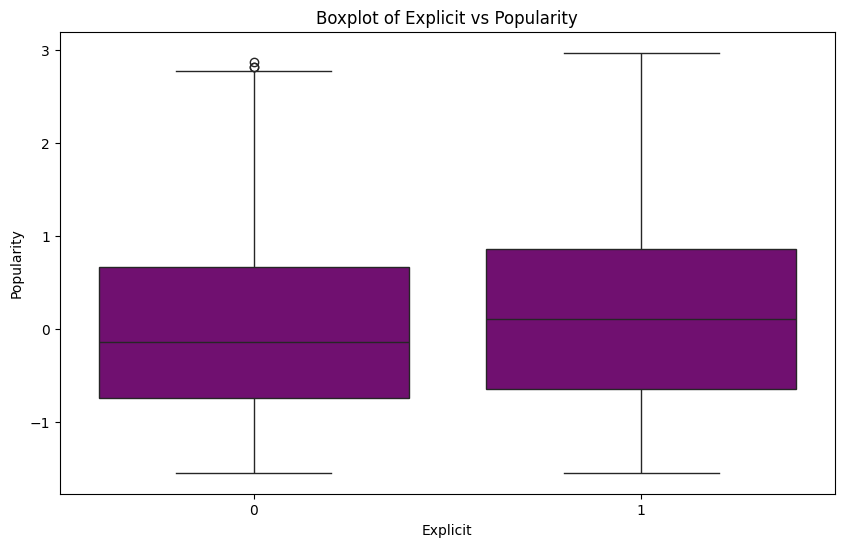

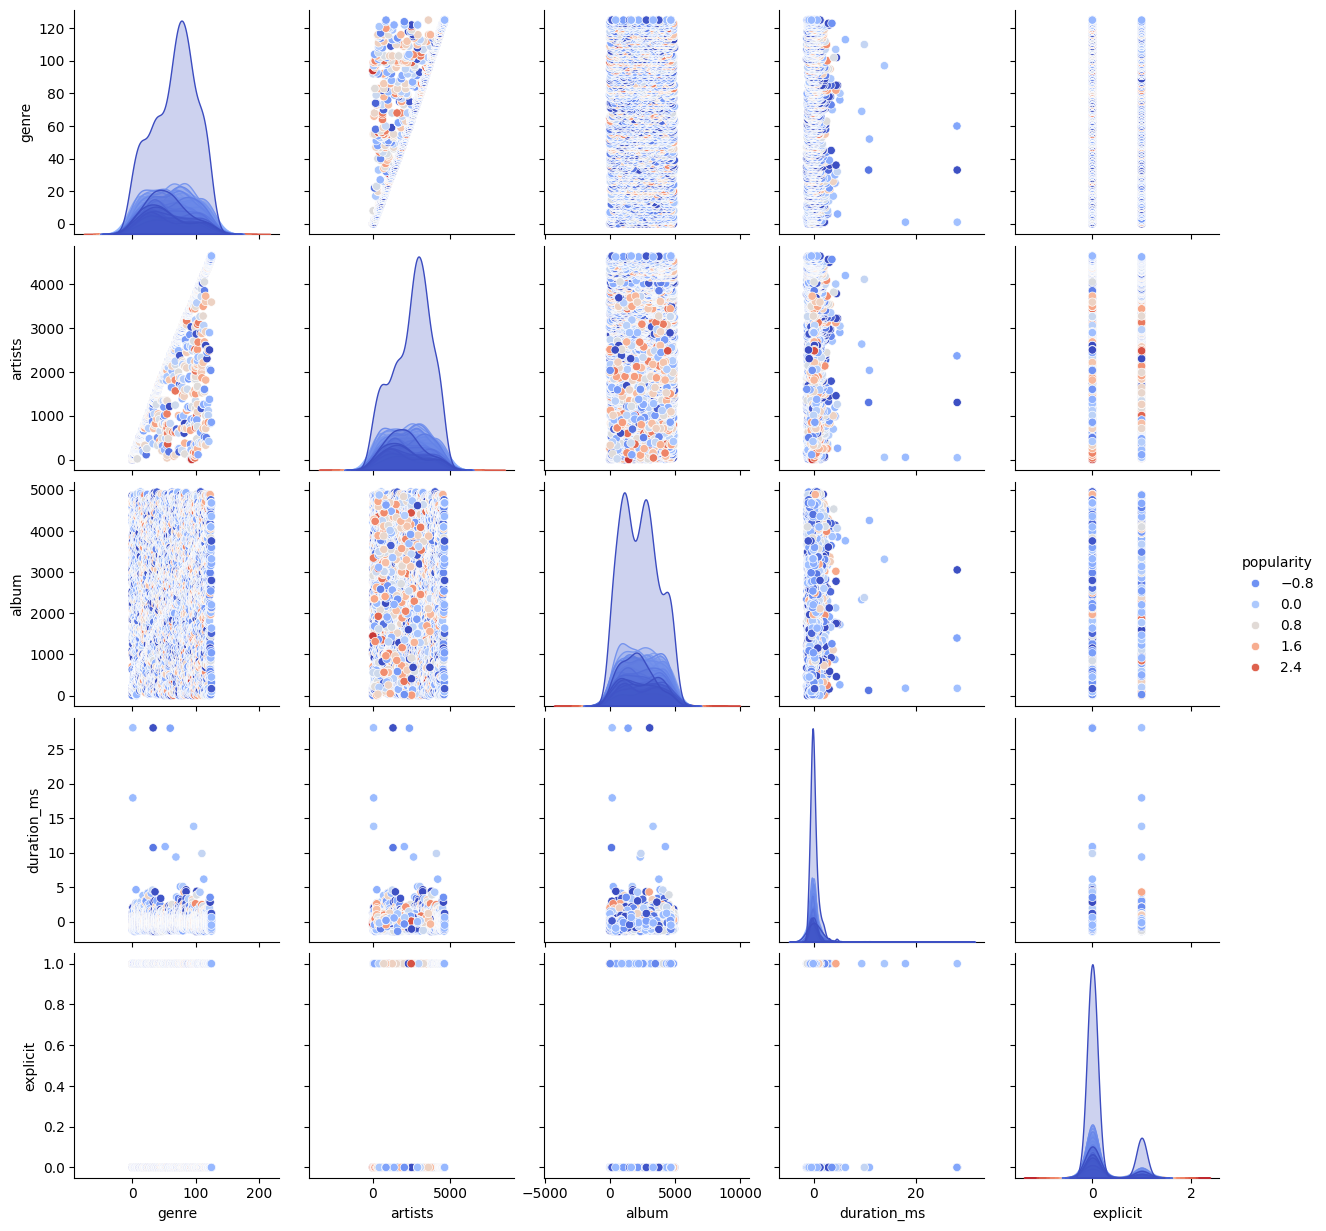

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, color='blue', bins=20)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap for numerical features
corr = X.join(y).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Boxplot for duration_ms vs popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x=X['duration_ms'], y=y, color='green')
plt.title('Boxplot of Duration vs Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

# Boxplot for explicit vs popularity
plt.figure(figsize=(10, 6))
sns.boxplot(x=X['explicit'], y=y, color='purple')
plt.title('Boxplot of Explicit vs Popularity')
plt.xlabel('Explicit')
plt.ylabel('Popularity')
plt.show()

# Pairplot for all features vs popularity
X['popularity'] = y
sns.pairplot(X, hue='popularity', palette='coolwarm')
plt.show()

In [69]:
tpot = TPOTRegressor(verbosity=2, generations=5, population_size=20, random_state=42)

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Access TPOT’s internal `evaluated_individuals_` dictionary, which contains models and their scores
# Sort models by their cross-validation scores in descending order and store the top 3
sorted_pipelines = sorted(tpot.evaluated_individuals_.items(), key=lambda x: x[1]['internal_cv_score'], reverse=True)
top_pipelines = sorted_pipelines[:3]  # Extract top 3 pipelines

# Display top 3 pipelines with their scores and configurations
for i, (pipeline_name, pipeline_info) in enumerate(top_pipelines, 1):
    print(f"Model {i}: {pipeline_name}")
    print(f"Cross-validation score: {pipeline_info['internal_cv_score']}")
    print("Pipeline configuration (steps):")
    print(pipeline_name)
    print("\n")

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.6998152628898389

Generation 2 - Current best internal CV score: -0.6950986189000979

Generation 3 - Current best internal CV score: -0.6842742297828467

Generation 4 - Current best internal CV score: -0.6842742297828467

Generation 5 - Current best internal CV score: -0.6617731797032844

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.7500000000000001, min_samples_leaf=3, min_samples_split=14, n_estimators=100)
Model 1: RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__min_samples_leaf=3, RandomForestRegressor__min_samples_split=14, RandomForestRegressor__n_estimators=100)
Cross-validation score: -0.6617731797032844
Pipeline configuration (steps):
RandomForestRegressor(input_matrix, RandomForestRegressor__bootstrap=True, RandomForestRegressor__max_features=0.7500000000000001, RandomForestRegressor__

In [72]:
# Initialize the RandomForestRegressor with the chosen configuration
model = RandomForestRegressor(
    bootstrap=True,
    max_features=0.75,
    min_samples_leaf=3,
    min_samples_split=14,
    n_estimators=100,
    random_state=42
)

# Train the model
model.fit(X_train, y_train)


RandomForestRegressor(max_features=0.75, min_samples_leaf=3,
                      min_samples_split=14, random_state=42)

In [75]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 0.6439
Mean Squared Error (MSE): 0.6726
Root Mean Squared Error (RMSE): 0.8201
R-squared (R²): 0.3345


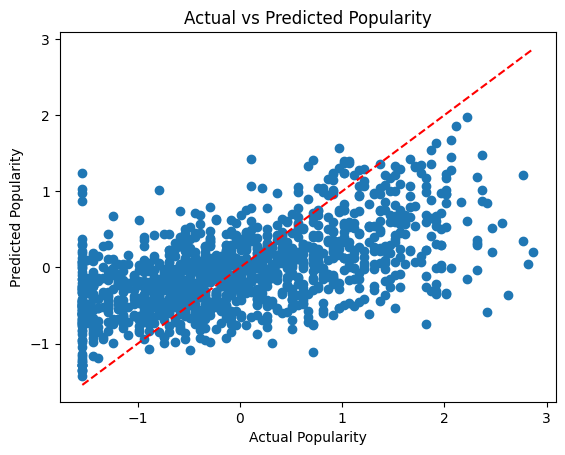

In [76]:
import matplotlib.pyplot as plt

# Plotting Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Popularity')
plt.ylabel('Predicted Popularity')
plt.title('Actual vs Predicted Popularity')
plt.show()